In [289]:
import pandas as pd
import glob

In [290]:
path = '/home/educacion/git-analytics/data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
# concatenating all the files in the folder data
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv("all_data.csv", index=False)


In [291]:
all_data = pd.read_csv("all_data.csv")
# data cleaning
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [292]:
# creating the column month
all_data['Month'] = all_data['Order Date'].str[0:2]
# changing types of the values of the columns Quantity Ordered and Price Each
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [293]:
# changing types of the values of the column Month and creating column Sales
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [294]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [295]:
results_month = all_data.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


In [296]:
# plotting the best months for sale
import matplotlib.pyplot as plt

Text(0.5, 0, 'Month Number')

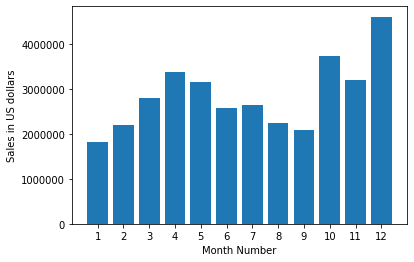

In [297]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in US dollars')
plt.xlabel('Month Number')

In [298]:
# formatting the Purchase address' column 
def get_city(address):
    return address.split(',')[1]
def get_state(state):
    return state.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
results_cities = all_data.groupby('City').sum()
results_cities

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


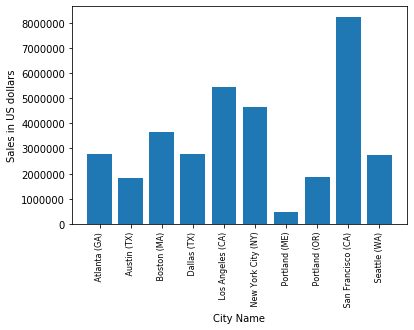

In [299]:
# plotting sales per city
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,results_cities['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in US dollars')
plt.xlabel('City Name')
plt.show()



In [300]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [301]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16,10


In [302]:
# plotting the best time for advertisement
hours = [hour for hour, df in all_data.groupby('Hour')]

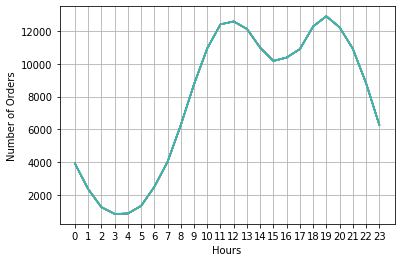

In [303]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

In [304]:
#  most often pair of products sold together
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

/home/educacion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [305]:
df.head()

,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"


In [306]:
# using itertools and collections for calculate most products sold together
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

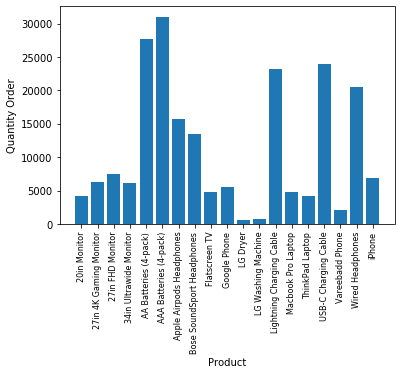

In [309]:
# plotting products and its quantities ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Order')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

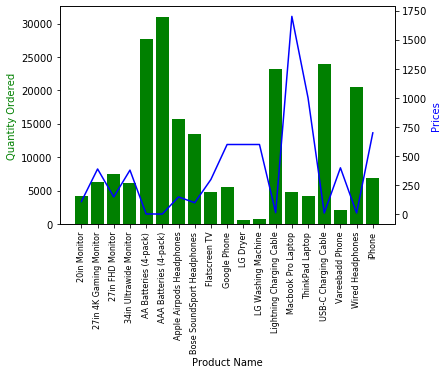

In [322]:
# relationship between prices an quantity ordered

prices = all_data.groupby('Product').mean()['Price Each']

fig ,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()